# Load Data

In [536]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [537]:
df1 = pd.read_csv("fordgobike-tripdataFor201902.csv")
df = df1.copy()
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,32:10.1,01:56.0,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,53:21.8,42:03.1,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,13:13.2,24:08.1,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,54:26.0,02:36.8,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,54:18.5,20:44.1,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,49:58.6,19:51.8,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,55:35.1,14:42.6,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,41:06.8,08:02.8,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,41:48.8,07:59.7,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,49:47.7,07:17.0,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


# Data Understanding

In [538]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 183416 entries, 0 to 183415
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183416 non-null  int64  
 1   start_time               183416 non-null  str    
 2   end_time                 183416 non-null  str    
 3   start_station_id         183219 non-null  float64
 4   start_station_name       183219 non-null  str    
 5   start_station_latitude   183416 non-null  float64
 6   start_station_longitude  183416 non-null  float64
 7   end_station_id           183219 non-null  float64
 8   end_station_name         183219 non-null  str    
 9   end_station_latitude     183416 non-null  float64
 10  end_station_longitude    183416 non-null  float64
 11  bike_id                  183416 non-null  int64  
 12  user_type                183416 non-null  str    
 13  member_birth_year        175151 non-null  float64
 14  member_gender  

In [539]:
df.describe(include="all")

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
count,183416.000000,183416,183416,183219.000000,183219,183416.000000,183416.000000,183219.000000,183219,183416.000000,183416.000000,183416.000000,183416,175151.000000,175151,183416
unique,NaN,35783,35767,NaN,329,NaN,NaN,NaN,329,NaN,NaN,NaN,2,NaN,3,2
top,NaN,12:19.2,22:24.4,NaN,Market St at 10th St,NaN,NaN,NaN,San Francisco Caltrain Station 2 (Townsend St...,NaN,NaN,NaN,Subscriber,NaN,Male,No
freq,NaN,16,20,NaN,3904,NaN,NaN,NaN,4857,NaN,NaN,NaN,163548,NaN,130655,166056
mean,726.067311,NaN,NaN,138.590365,NaN,37.771221,-122.352661,136.249401,NaN,37.771425,-122.352247,4472.890260,NaN,1984.806504,NaN,NaN
std,1794.371831,NaN,NaN,111.778938,NaN,0.099586,0.117100,111.514916,NaN,0.099494,0.116677,1664.386068,NaN,10.116589,NaN,NaN
min,61.000000,NaN,NaN,3.000000,NaN,37.317298,-122.453705,3.000000,NaN,37.317298,-122.453705,11.000000,NaN,1878.000000,NaN,NaN
25%,325.000000,NaN,NaN,47.000000,NaN,37.770083,-122.412408,44.000000,NaN,37.770407,-122.411726,3777.000000,NaN,1980.000000,NaN,NaN
50%,514.000000,NaN,NaN,104.000000,NaN,37.780760,-122.398285,100.000000,NaN,37.781010,-122.398279,4958.000000,NaN,1987.000000,NaN,NaN
75%,796.000000,NaN,NaN,239.000000,NaN,37.797280,-122.286533,235.000000,NaN,37.797320,-122.288045,5502.000000,NaN,1992.000000,NaN,NaN


In [540]:
# Check for duplicates in the dataset
df.duplicated().sum()

4

In [541]:
df = df.drop_duplicates()

In [542]:
# check for missing values in the dataset
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

# Handle missing values

In [543]:
# base on show above, we can see that there are missing values in the 'start_station_id', 'start_station_name', 'end_station_id', 'end_station_name', 'member_birth_year', and 'member_gender' columns. 
# We can fill these missing values with the mode for categorical columns and the median for numerical columns.
try:
    df['start_station_id'] = df['start_station_id'].fillna(df['start_station_id'].mode()[0])

    df['start_station_name'] = df['start_station_name'].fillna('Unknown')

    df['end_station_id'] = df['end_station_id'].fillna(df['end_station_id'].mode()[0])

    df['end_station_name'] = df['end_station_name'].fillna('Unknown')

    df['member_birth_year'] = df['member_birth_year'].fillna(df['member_birth_year'].median())

    df['member_gender'] = df['member_gender'].fillna('Unknown')

except Exception as e:
    print(f"An error occurred while filling missing values: {e}")


In [544]:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

# Handling outliers 

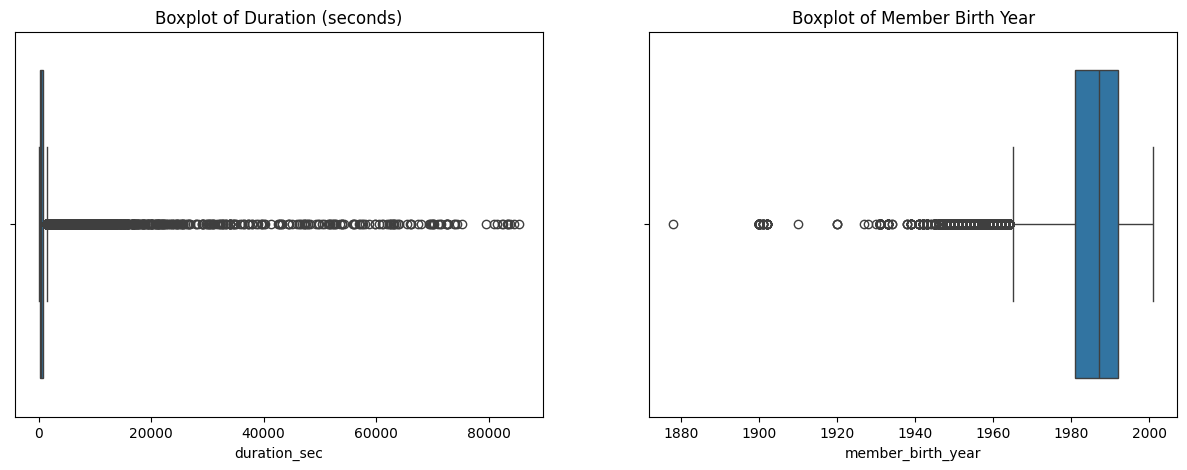

In [545]:
# From df.describe(include="all") we can see that there are outliers in the 'duration_sec' column, 
# as the max value is significantly higher than the 75th percentile.
# and member_birth_year column also has outliers as the max value is significantly higher than the 75th percentile. 
# We can visualize this using a boxplot.
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['duration_sec'])
plt.title('Boxplot of Duration (seconds)')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['member_birth_year'])
plt.title('Boxplot of Member Birth Year')
plt.show()

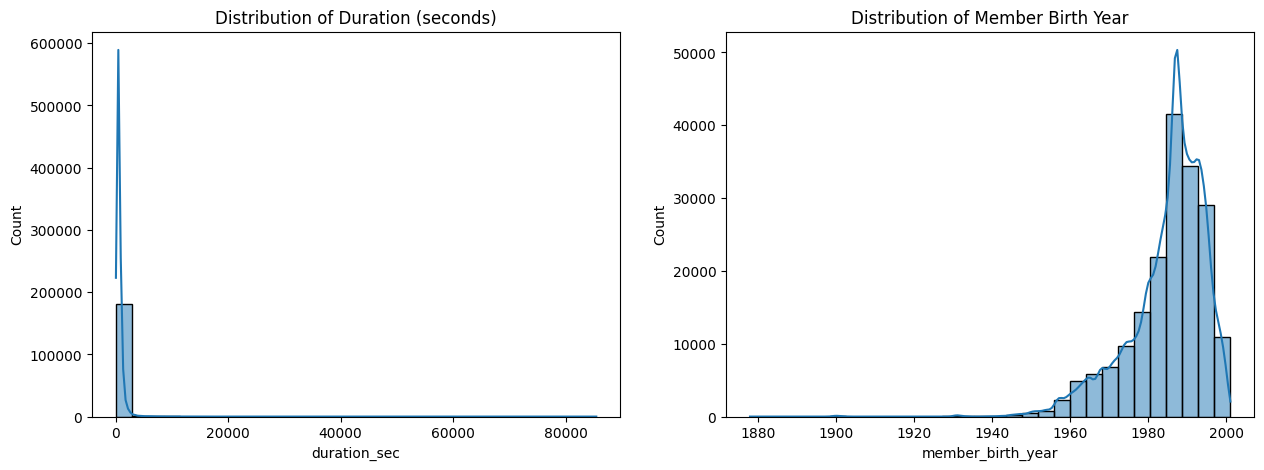

In [546]:
# We can also visualize the distribution of these columns using a histogram.
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['duration_sec'], bins=30, kde=True)
plt.title('Distribution of Duration (seconds)')

plt.subplot(1, 2, 2)
sns.histplot(df['member_birth_year'], bins=30, kde=True)
plt.title('Distribution of Member Birth Year')
plt.show()

In [547]:
# Based on the above analysis, we can conclude that there are outliers in the 'duration_sec' and 'member_birth_year' columns.
outliers_columns = ['duration_sec', 'member_birth_year']

In [548]:
# We can use the IQR method to identify and remove outliers from these columns.
for col in outliers_columns:

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)

    print("Number of outliers:", outliers.sum())

    df = df[~outliers]

Number of outliers: 10131
Number of outliers: 8335


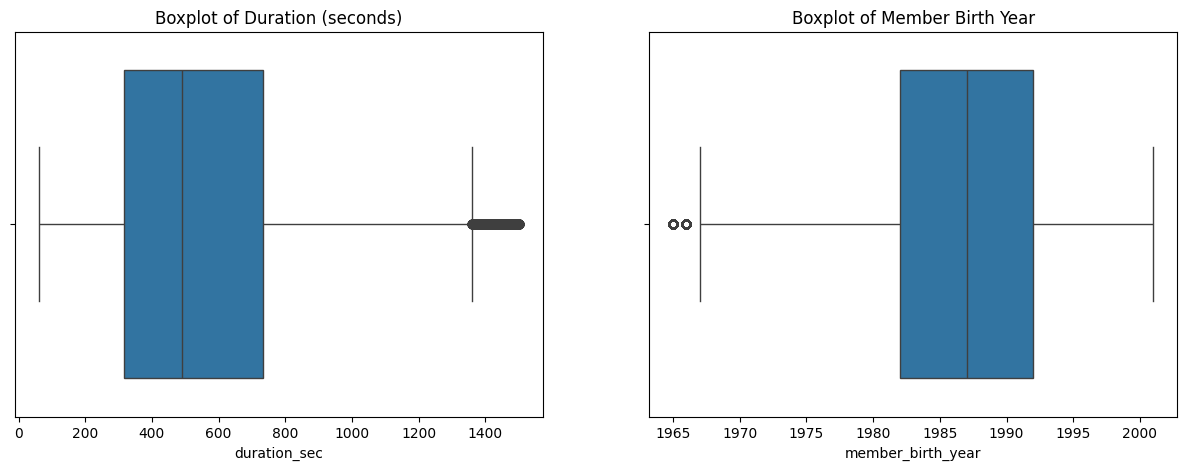

In [549]:
# After removing outliers, we can visualize the boxplot again to confirm that the outliers have been removed.
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['duration_sec'])
plt.title('Boxplot of Duration (seconds)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['member_birth_year'])
plt.title('Boxplot of Member Birth Year')
plt.show()

# Standardize Categories

In [550]:
# From df.describe(include="all") we find that there are some categorical columns that we can Standardize the unique values in these columns. 
# These columns are 'user_type','member_gender' and 'bike_share_for_all_trip'.
cat_columns = ['user_type', 'member_gender', 'bike_share_for_all_trip']

for col in cat_columns:
    print(f"Values in '{col}' column: {df[col].value_counts()}")
    print("*"*25)
    print(f"Unique values in '{col}' column: {df[col].unique()}")
    print("="*50)

Values in 'user_type' column: user_type
Subscriber    149317
Customer       15629
Name: count, dtype: int64
*************************
Unique values in 'user_type' column: <StringArray>
['Subscriber', 'Customer']
Length: 2, dtype: str
Values in 'member_gender' column: member_gender
Male       117759
Female      36721
Unknown      7305
Other        3161
Name: count, dtype: int64
*************************
Unique values in 'member_gender' column: <StringArray>
['Female', 'Male', 'Unknown', 'Other']
Length: 4, dtype: str
Values in 'bike_share_for_all_trip' column: bike_share_for_all_trip
No     149926
Yes     15020
Name: count, dtype: int64
*************************
Unique values in 'bike_share_for_all_trip' column: <StringArray>
['No', 'Yes']
Length: 2, dtype: str


In [551]:
# we strip the whitespace and convert the values to lowercase to ensure consistency in the 'member_gender' column.
df['member_gender'] = df['member_gender'].str.strip().str.lower()

# After cleaning 'member_gender' column, we now Standardize of names in the 'member_gender' column to ensure that all values are consistent and can be easily analyzed.
df['member_gender'] = df['member_gender'].replace(
    {
    'm': 'male',
    'f': 'female',
    'unknown': 'other'
    })

In [552]:
# we strip the whitespace and convert the values to lowercase to ensure consistency in the 'user_type' column.
df['user_type'] = df['user_type'].str.strip().str.lower()

# After cleaning 'user_type' column, we now Standardize of names in the 'user_type' column to ensure that all values are consistent and can be easily analyzed.
df['user_type'] = df['user_type'].replace({
    'subscriber': 'subscriber',
    'customer': 'customer'
})

In [553]:
# We strip the whitespace and convert the values to lowercase to ensure consistency in the 'bike_share_for_all_trip' column.
df['bike_share_for_all_trip'] = df['bike_share_for_all_trip'].str.strip().str.lower()

# After cleaning 'bike_share_for_all_trip' column, we now Standardize of names in the 'bike_share_for_all_trip' column to ensure that all values are consistent and can be easily analyzed.
df['bike_share_for_all_trip'] = df['bike_share_for_all_trip'].replace({
    'yes': 'yes',
    'no': 'no'
})

In [554]:
# check the unique values in the categorical columns again to confirm that they have been standardized.
for col in cat_columns:
    print(f"Values in '{col}' column: {df[col].value_counts()}")
    print("*"*25)
    print(f"Unique values in '{col}' column: {df[col].unique()}")
    print("="*50)

Values in 'user_type' column: user_type
subscriber    149317
customer       15629
Name: count, dtype: int64
*************************
Unique values in 'user_type' column: <StringArray>
['subscriber', 'customer']
Length: 2, dtype: str
Values in 'member_gender' column: member_gender
male      117759
female     36721
other      10466
Name: count, dtype: int64
*************************
Unique values in 'member_gender' column: <StringArray>
['female', 'male', 'other']
Length: 3, dtype: str
Values in 'bike_share_for_all_trip' column: bike_share_for_all_trip
no     149926
yes     15020
Name: count, dtype: int64
*************************
Unique values in 'bike_share_for_all_trip' column: <StringArray>
['no', 'yes']
Length: 2, dtype: str


# Engineer features

In [555]:
# Trip duration_sec to minutes.
df['duration_min'] = df['duration_sec'] / 60

In [556]:
# this for check data after trip duration_sec to minutes in randomly. 
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
88814,320,17:38.9,22:58.9,268.0,Ellsworth St at Russell St,37.857490,-122.261578,241.0,Ashby BART Station,37.852477,-122.270213,1165,subscriber,1995.0,male,no,5.333333
131230,389,40:43.0,47:12.4,321.0,5th St at Folsom,37.780146,-122.403071,26.0,1st St at Folsom St,37.787290,-122.394380,1948,subscriber,1969.0,male,no,6.483333
99217,186,49:46.5,52:52.8,25.0,Howard St at 2nd St,37.787522,-122.397405,343.0,Bryant St at 2nd St,37.783172,-122.393572,4615,subscriber,1990.0,male,no,3.100000
111817,573,37:22.2,46:55.7,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,2330,subscriber,1981.0,female,no,9.550000
5895,890,44:22.6,59:13.4,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,113.0,Franklin Square,37.764555,-122.410345,5875,customer,1988.0,male,no,14.833333


# weekend flag 
- This process is illogical because we do not have date-time in dataset.
- We just have duration that we got it from subtraction start_time from end_time.

In [557]:
# Age Groups
# First, we will create a new column 'age' by subtracting the 'member_birth_year' from the current year (2026).
df['age'] = 2026 - df['member_birth_year']

# next, we will create age groups based on the 'age' column. We will use the following age groups:
# - Young: 0-25 years
# - Adult: 26-40 years
# - Middle Age: 41-60 years
# - Senior: 61-100 years
bins = [0, 25, 40, 60, 100]
labels = ['Young', 'Adult', 'Middle Age', 'Senior']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

In [558]:
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,age,age_group
70369,401,23:22.3,30:03.4,246.0,Berkeley Civic Center,37.869060,-122.270556,262.0,West St at University Ave,37.869967,-122.286533,5211,customer,2000.0,male,no,6.683333,26.0,Adult
18139,240,20:21.5,24:21.6,100.0,Bryant St at 15th St,37.767100,-122.410662,223.0,16th St Mission BART Station 2,37.764765,-122.420091,2134,subscriber,1982.0,male,no,4.000000,44.0,Middle Age
172235,1485,31:44.1,56:30.1,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,4751,customer,1984.0,male,no,24.750000,42.0,Middle Age
54270,527,16:04.0,24:51.4,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,5409,subscriber,1984.0,male,no,8.783333,42.0,Middle Age
158536,646,52:52.6,03:39.2,230.0,14th St at Mandela Pkwy,37.810743,-122.291415,151.0,53rd St at Hollis St,37.836182,-122.287180,4494,subscriber,1983.0,female,no,10.766667,43.0,Middle Age


# Encode/scale

In [559]:
# show the categorical columns in the dataset.
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['start_time', 'end_time', 'start_station_name', 'end_station_name',
       'user_type', 'member_gender', 'bike_share_for_all_trip'],
      dtype='str')


In [560]:
# We will use 'user_type', 'member_gender' and 'bike_share_for_all_trip' columns for encoding.
# because these columns are categorical and have a small number of unique values.
# we will use Label Encoding to convert 'bike_share_for_all_trip' and 'user_type' into numerical values.
# And use one-hot encoding for 'member_gender' column because it is nominal categories and not binary.
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# Label Encoding for 'user_type' and 'bike_share_for_all_trip'
for col in ['user_type', 'bike_share_for_all_trip']:
    df[col + '_encoded'] = LabelEncoder().fit_transform(df[col])

# One-hot encoding for 'member_gender' column.
encoder = OneHotEncoder(sparse_output=False)

member_gender_encoded = encoder.fit_transform(df[['member_gender']])

encoded_df = pd.DataFrame(member_gender_encoded, 
                          columns=encoder.get_feature_names_out(['member_gender']),
                          index=df.index)

df = pd.concat([df, encoded_df], axis=1)

df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,duration_min,age,age_group,user_type_encoded,bike_share_for_all_trip_encoded,member_gender_female,member_gender_male,member_gender_other
109880,285,33:40.5,38:25.5,102.0,Irwin St at 8th St,37.766883,-122.399579,90.0,Townsend St at 7th St,37.771058,...,male,no,4.750000,35.0,Adult,1,0,0.0,1.0,0.0
97229,473,09:29.2,17:22.6,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,61.0,Howard St at 8th St,37.776513,...,male,no,7.883333,32.0,Adult,1,0,0.0,1.0,0.0
6802,503,40:05.4,48:29.0,109.0,17th St at Valencia St,37.763316,-122.421904,125.0,20th St at Bryant St,37.759200,...,male,yes,8.383333,53.0,Middle Age,1,1,0.0,1.0,0.0
177711,919,17:44.3,33:04.2,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,321.0,5th St at Folsom,37.780146,...,female,no,15.316667,45.0,Middle Age,1,0,1.0,0.0,0.0
168435,677,07:52.1,19:09.8,10.0,Washington St at Kearny St,37.795393,-122.404770,34.0,Father Alfred E Boeddeker Park,37.783988,...,female,no,11.283333,35.0,Adult,1,0,1.0,0.0,0.0


In [561]:
# Scaling Numerical Features
# We will scale the 'age' and 'duration_min' columns using StandardScaler.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df[['age_scaled', 'duration_min_scaled']] = scaler.fit_transform(df[['age', 'duration_min']])

df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,duration_min,age,age_group,user_type_encoded,bike_share_for_all_trip_encoded,member_gender_female,member_gender_male,member_gender_other,age_scaled,duration_min_scaled
31535,1069,23:50.5,41:40.2,10.0,Washington St at Kearny St,37.795393,-122.404770,343.0,Bryant St at 2nd St,37.783172,...,17.816667,38.0,Adult,0,0,1.0,0.0,0.0,-0.220784,1.689312
81303,989,26:10.1,42:39.2,368.0,Myrtle St at Polk St,37.785434,-122.419622,119.0,18th St at Noe St,37.761047,...,16.483333,38.0,Adult,1,0,1.0,0.0,0.0,-0.220784,1.427539
80080,410,22:07.8,28:58.2,58.0,Market St at 10th St,37.776619,-122.417385,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,...,6.833333,28.0,Adult,0,0,0.0,1.0,0.0,-1.510377,-0.467041
41458,1047,20:50.2,38:17.5,9.0,Broadway at Battery St,37.798572,-122.400869,96.0,Dolores St at 15th St,37.766210,...,17.450000,31.0,Adult,1,0,0.0,1.0,0.0,-1.123499,1.617325
34011,627,43:04.1,53:31.5,72.0,Page St at Scott St,37.772406,-122.435650,123.0,Folsom St at 19th St,37.760594,...,10.450000,42.0,Middle Age,1,0,1.0,0.0,0.0,0.295053,0.243018


# EDA

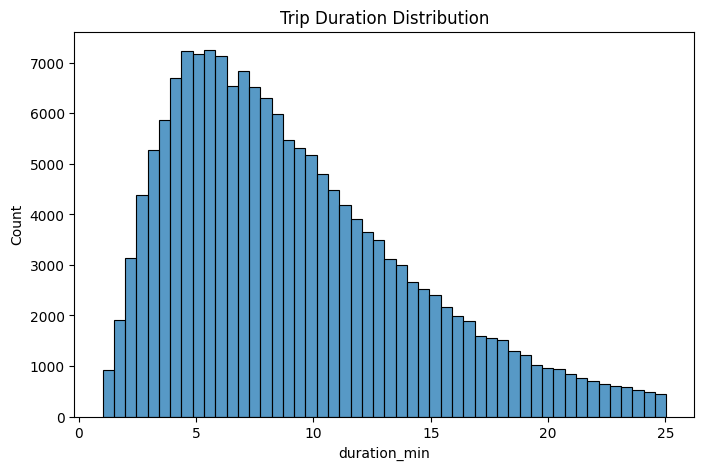

In [562]:
# Duration distribution.
# From the histogram, we can see that the duration of trips is right-skewed, with most trips lasting less than 20 minutes.
plt.figure(figsize=(8,5))
sns.histplot(df['duration_min'], bins=50)
plt.title("Trip Duration Distribution")
plt.show()

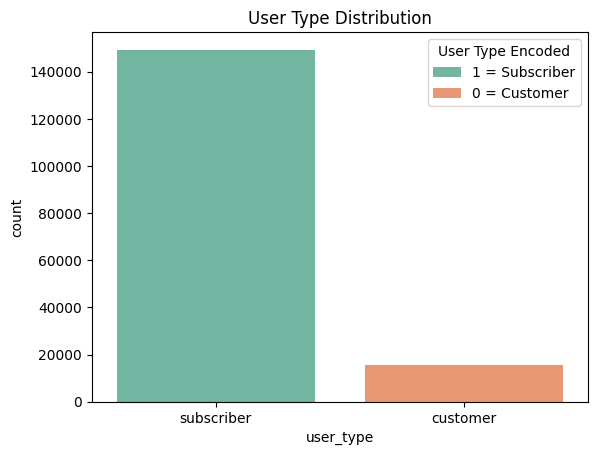

In [563]:
# Subscriber vs customer.
ax = sns.countplot(data=df, x='user_type', palette='Set2')
plt.title("User Type Distribution")
plt.legend(handles=ax.patches, 
           labels=['1 = Subscriber', '0 = Customer'], 
           title='User Type Encoded')
plt.show()

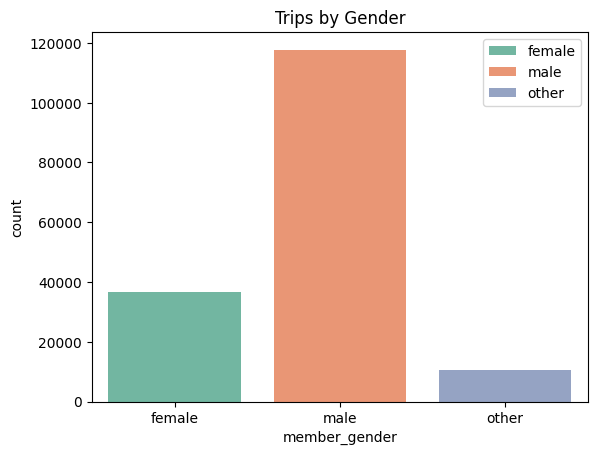

In [564]:
# This show the number of trips for each gender.
# We can see that male members have significantly more trips than female members.
sns.countplot(data=df, x='member_gender', palette='Set2')
plt.title("Trips by Gender")
plt.legend(handles=plt.gca().patches,
           labels=['female', 'male', 'other'],
           loc='upper right')
plt.show()

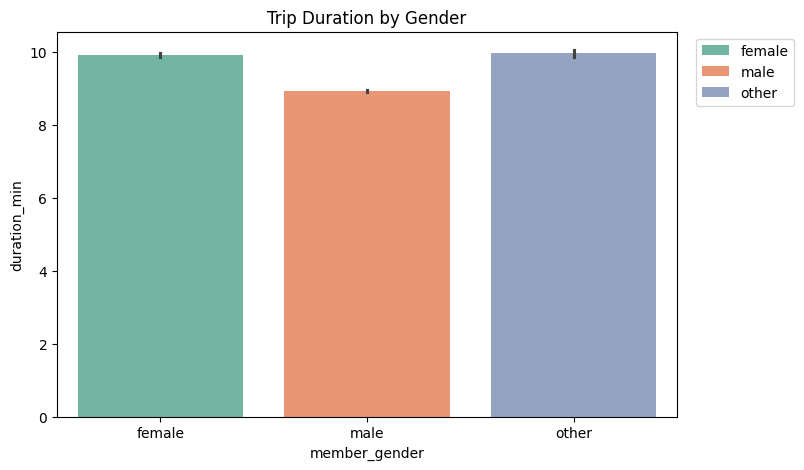

In [565]:
# This show the duration of trips for each gender.
# We can see that male members have a bit shorter trip durations compared to female members.
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='member_gender', y='duration_min', palette='Set2')
plt.title("Trip Duration by Gender")
plt.legend(handles=plt.gca().patches,
           labels=['female', 'male', 'other'],
           loc='upper right',
           bbox_to_anchor=(1.2,1))
plt.show()

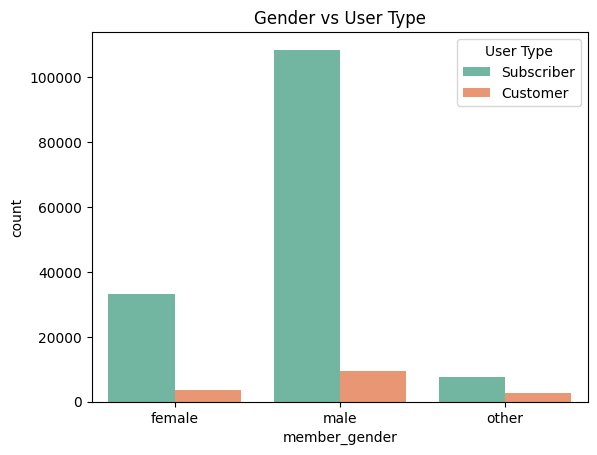

In [566]:
# Gender vs User Type.
# We can see that the majority of members in all user types are subscribers .
sns.countplot(data=df, x='member_gender', hue='user_type', palette='Set2')
plt.title("Gender vs User Type")
plt.legend(title='User Type', loc='upper right', labels=[ 'Subscriber', 'Customer'])
plt.show()

- More of Data Understanding

In [567]:
# This show the average trip duration in minutes for each user type. 
# We can see that subscribers tend to have shorter trip durations compared to customers.
df.groupby('user_type')['duration_min'].mean()

user_type
customer      11.985025
subscriber     8.921962
Name: duration_min, dtype: float64

In [568]:
# This show the average trip duration in minutes for each age group.
# We can see that younger age groups tend to have shorter trip durations compared to older age groups.
df.groupby('age_group')['duration_min'].mean()

age_group
Young         14.774444
Adult          9.215624
Middle Age     9.217361
Senior         8.699692
Name: duration_min, dtype: float64

# Save Clean Data

In [569]:
df.to_csv('clean_data.csv', index=False)

In [573]:
df2 = pd.read_csv('clean_data.csv')
df2.info()

<class 'pandas.DataFrame'>
RangeIndex: 164946 entries, 0 to 164945
Data columns (total 26 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   duration_sec                     164946 non-null  int64  
 1   start_time                       164946 non-null  str    
 2   end_time                         164946 non-null  str    
 3   start_station_id                 164946 non-null  float64
 4   start_station_name               164946 non-null  str    
 5   start_station_latitude           164946 non-null  float64
 6   start_station_longitude          164946 non-null  float64
 7   end_station_id                   164946 non-null  float64
 8   end_station_name                 164946 non-null  str    
 9   end_station_latitude             164946 non-null  float64
 10  end_station_longitude            164946 non-null  float64
 11  bike_id                          164946 non-null  int64  
 12  user_type    